In [2]:
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

**Perceptron Algorithm:**

In [3]:
x = np.array([[1,3],[2.5, 1.5], [-1.5, 1.5]])
y = [1, 1, - 1]

X = pd.DataFrame(x, columns=['x11', 'x12'])
X = X.assign(y = y)

In [4]:
theta = np.array([1, - 1]).reshape(2, 1)
theta_null = 1
changed = False

for t in range(100):
    for i in range(x.shape[0]):
        dummy = X['y'][i]*np.matmul(theta.T, x[i,:].reshape(2, 1)) + theta_null
        if dummy <= 0:
            theta = theta + X['y'][i]*x[i,:].reshape(2, 1)
            theta_null = theta_null + X['y'][i]
            changed = True
    if changed == False:
        break

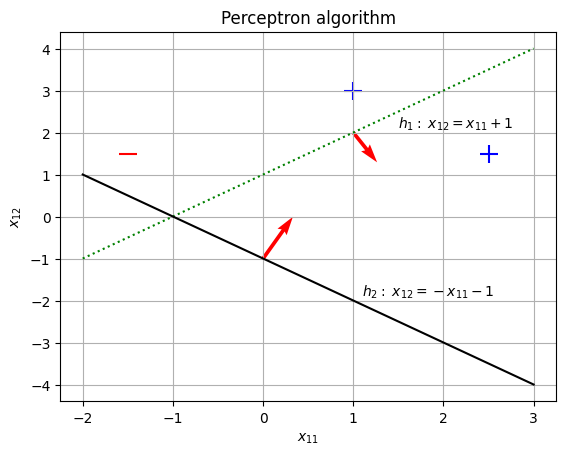

In [6]:
plt.scatter(X[X['y'] > 0]['x11'], X[X['y'] > 0]['x12'], marker='+', s=150, c='b')
plt.scatter(X[X['y'] < 0]['x11'], X[X['y'] < 0]['x12'], marker='_', s=150, c='r')

plt.plot(np.linspace(-2, 3, num=10), np.linspace(-2, 3, num=10) + 1, 'g:')
plt.text(1.5, 2.1, '$h_1:$ $x_{12} = x_{11} + 1$')
plt.quiver(1, 2, 0.4, -0.5, color='r', units='xy', scale=1)

plt.plot(np.linspace(-2, 3, num=10), - np.linspace(-2, 3, num=10) - 1, 'k')
plt.text(1.1, -1.9, '$h_2:$ $x_{12} = - x_{11} - 1$')
plt.quiver(0, -1, 0.5, 0.7, color='r', units='xy', scale=1)

plt.xlabel('$x_{11}$')
plt.ylabel('$x_{12}$')
plt.title('Perceptron algorithm')
plt.grid()
plt.show()

**Perceptron through origin (w/o an offset term):**

In [7]:
X = np.array([[1], [2], [3], [4]]).reshape(4, 1)
Y = np.array([[1], [1], [-1], [-1]])

X_new = np.append(X, np.ones((4, 1)), axis=1)
theta = np.zeros(2).reshape(2, 1)

for t in range(10):
    for i in range(X_new.shape[0]):
        dummy = Y[i, 0]*np.matmul(theta.T, X_new[i].reshape(2, 1))
        if dummy <= 0:
            theta = theta + Y[i,0]*X_new[i].reshape(2, 1)

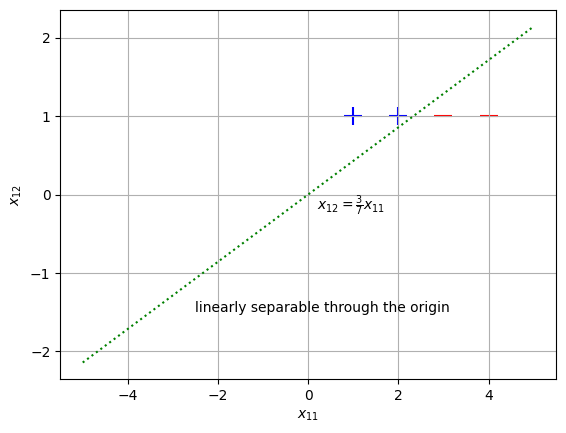

In [8]:
df = pd.DataFrame(X_new, columns=['x11', 'x12'])
df = df.assign(y = Y)

plt.scatter(df[df['y'] > 0]['x11'], df[df['y'] > 0]['x12'], marker='+', s=150, c='b')
plt.scatter(df[df['y'] < 0]['x11'], df[df['y'] < 0]['x12'], marker='_', s=150, c='r')
plt.plot(np.linspace(-5, 5, num=10), (3/7)*np.linspace(-5, 5, num=10), 'g:')
plt.text(0.2, -0.2, '$x_{12} = \\frac{3}{7} x_{11}$')
plt.text(- 2.5, -1.5, 'linearly separable through the origin')
plt.xlabel('$x_{11}$')
plt.ylabel('$x_{12}$')
plt.grid()